**Title : Big 4 Financial Risk Compliance**
> Author: Clarissa B. Kosasih  

This code uses dataset from [here](https://www.kaggle.com/datasets/atharvasoundankar/big-4-financial-risk-insights-2020-2025/data)

# Dataset Introduction
Columns:
1. Year : The year of the audit report (2020-2025).
2. Firm_Name : The consulting firm conducting the audit (Ernst & Young, PwC, Deloitte, KPMG).
3. Total_Audit_Engagements : Number of audit engagements handled by the firm.
4. High_Risk_Cases : Number of audits flagged as high-risk due to compliance concerns.
5. Compliance_Violations : The number of regulatory breaches detected.
6. Fraud_Cases_Detected : The number of fraud cases uncovered during audits.
7. Industry_Affected : The sector impacted (Finance, Tech, Retail, Healthcare).
8. Total_Revenue_Impact : The estimated financial impact due to fraud or compliance issues (in millions USD).
9. AI_Used_for_Auditing : Whether AI was used in the auditing process (Yes/No).
10. Employee_Workload : The average hours worked per week by auditors.
11. Audit_Effectiveness_Score
12. Client_Satisfaction_Score

# Import Libraries & Read Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('big4_financial_risk_compliance.csv')
data.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


The dataset is already clean.

# EDA

In [7]:
# Separate categorical columns and numerical columns
cat_cols = data.select_dtypes(include = ['object', 'category']).columns
num_cols = data.select_dtypes(include = ['number']).columns

print(f'Categorical Columns: {cat_cols}')
print(f'\nNumerical Columns: {num_cols}')
print(f'\nTotal Columns: {len(cat_cols) + len(num_cols)}')

Categorical Columns: Index(['Firm_Name', 'Industry_Affected', 'AI_Used_for_Auditing'], dtype='object')

Numerical Columns: Index(['Year', 'Total_Audit_Engagements', 'High_Risk_Cases',
       'Compliance_Violations', 'Fraud_Cases_Detected', 'Total_Revenue_Impact',
       'Employee_Workload', 'Audit_Effectiveness_Score',
       'Client_Satisfaction_Score'],
      dtype='object')

Total Columns: 12


## Numerical Columns

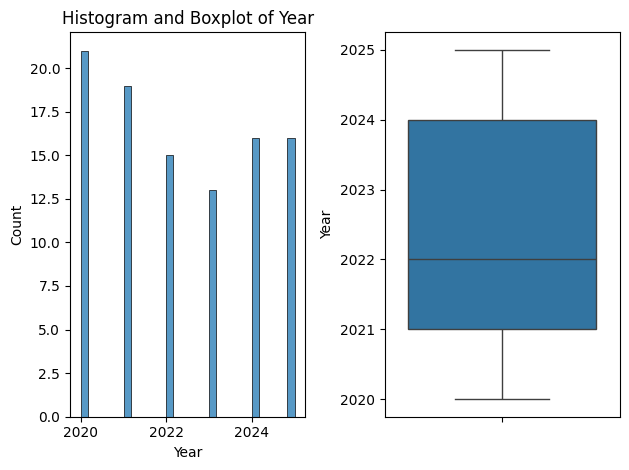

Skewness:  0.14891046885646134
Kurtosis:  -1.360206767763013


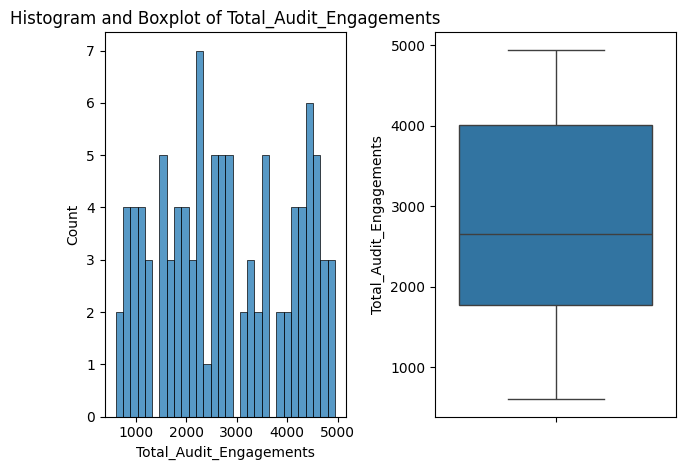

Skewness:  0.08254036953732688
Kurtosis:  -1.2286819271457443


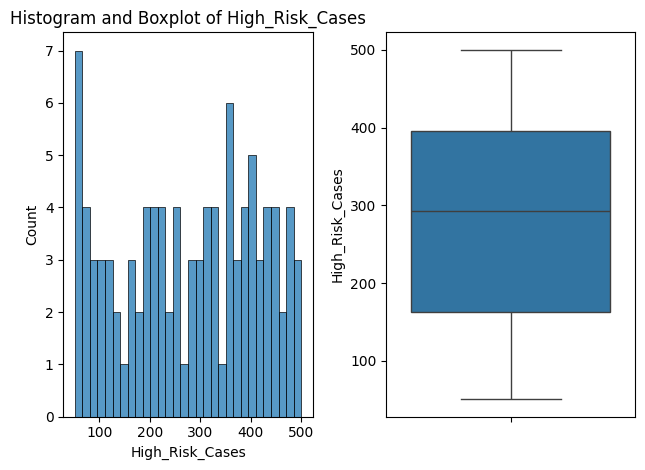

Skewness:  -0.132153812765553
Kurtosis:  -1.2348245079275315


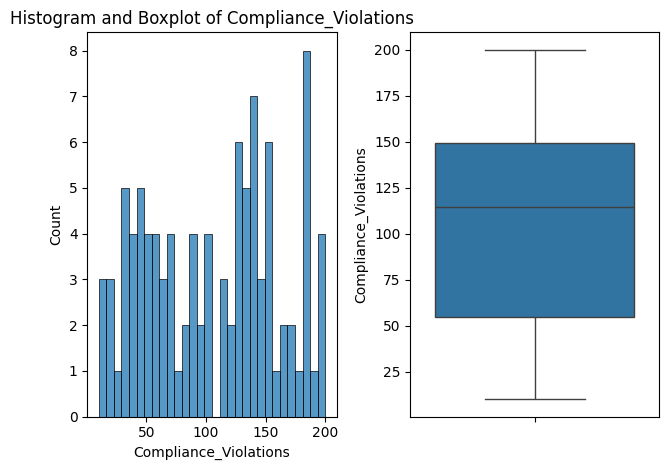

Skewness:  -0.020831050621919495
Kurtosis:  -1.2306528414597369


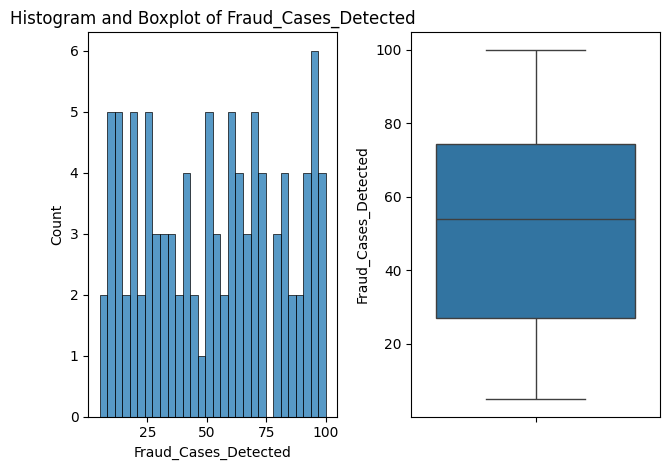

Skewness:  0.020617159883556137
Kurtosis:  -1.2459305517540904


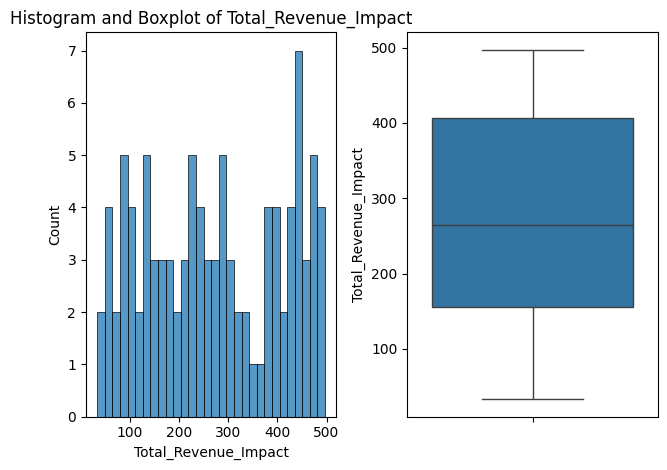

Skewness:  0.01077373146469078
Kurtosis:  -1.2975476233396346


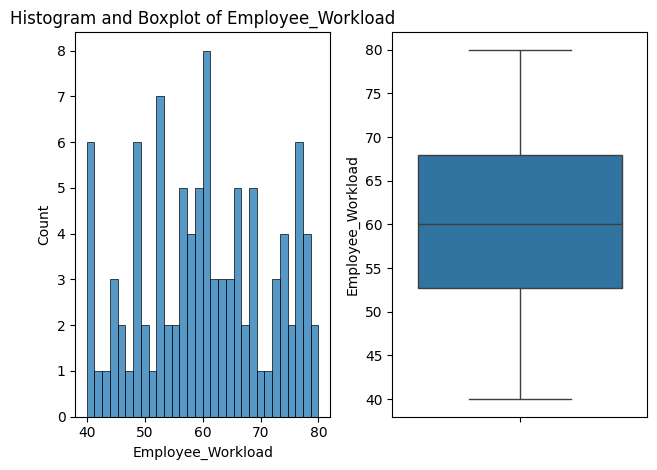

Skewness:  -0.042598286192161376
Kurtosis:  -0.9262522152777444


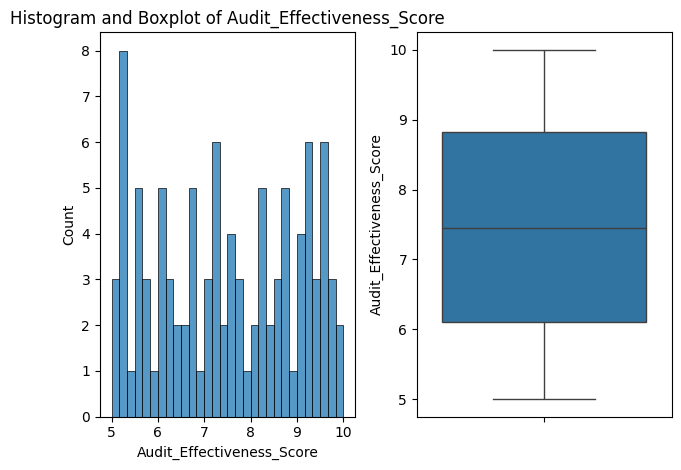

Skewness:  -0.04470559137915231
Kurtosis:  -1.3221450259466496


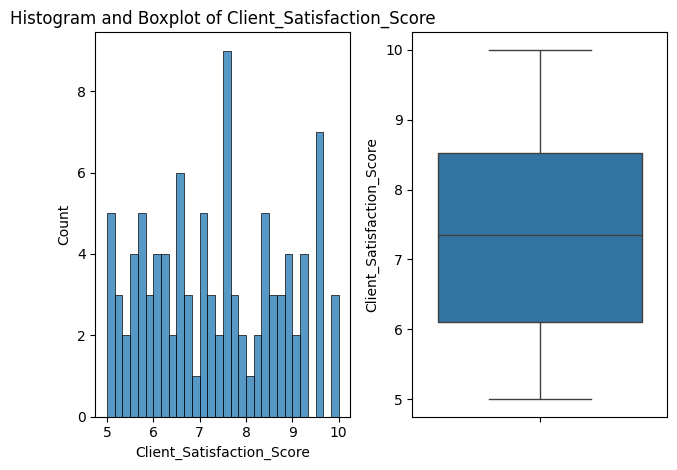

Skewness:  0.12230753419978582
Kurtosis:  -1.1468987470046068


In [8]:
for i in num_cols:
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()
  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

In [9]:
from scipy.stats import shapiro

for i in num_cols:
  if shapiro(data[i]).pvalue < 0.05:
    print(f'Column {i} is NOT normally distributed')
  else:
    print(f'Column {i} is normally distributed')

Column Year is NOT normally distributed
Column Total_Audit_Engagements is NOT normally distributed
Column High_Risk_Cases is NOT normally distributed
Column Compliance_Violations is NOT normally distributed
Column Fraud_Cases_Detected is NOT normally distributed
Column Total_Revenue_Impact is NOT normally distributed
Column Employee_Workload is NOT normally distributed
Column Audit_Effectiveness_Score is NOT normally distributed
Column Client_Satisfaction_Score is NOT normally distributed


## Categorical Columns

In [10]:
for col in cat_cols:
  print(f"\n{col} --------------------")
  print(data[col].value_counts())


Firm_Name --------------------
Firm_Name
Deloitte         30
PwC              25
Ernst & Young    23
KPMG             22
Name: count, dtype: int64

Industry_Affected --------------------
Industry_Affected
Tech          29
Retail        27
Healthcare    24
Finance       20
Name: count, dtype: int64

AI_Used_for_Auditing --------------------
AI_Used_for_Auditing
No     55
Yes    45
Name: count, dtype: int64


## Based on Firm

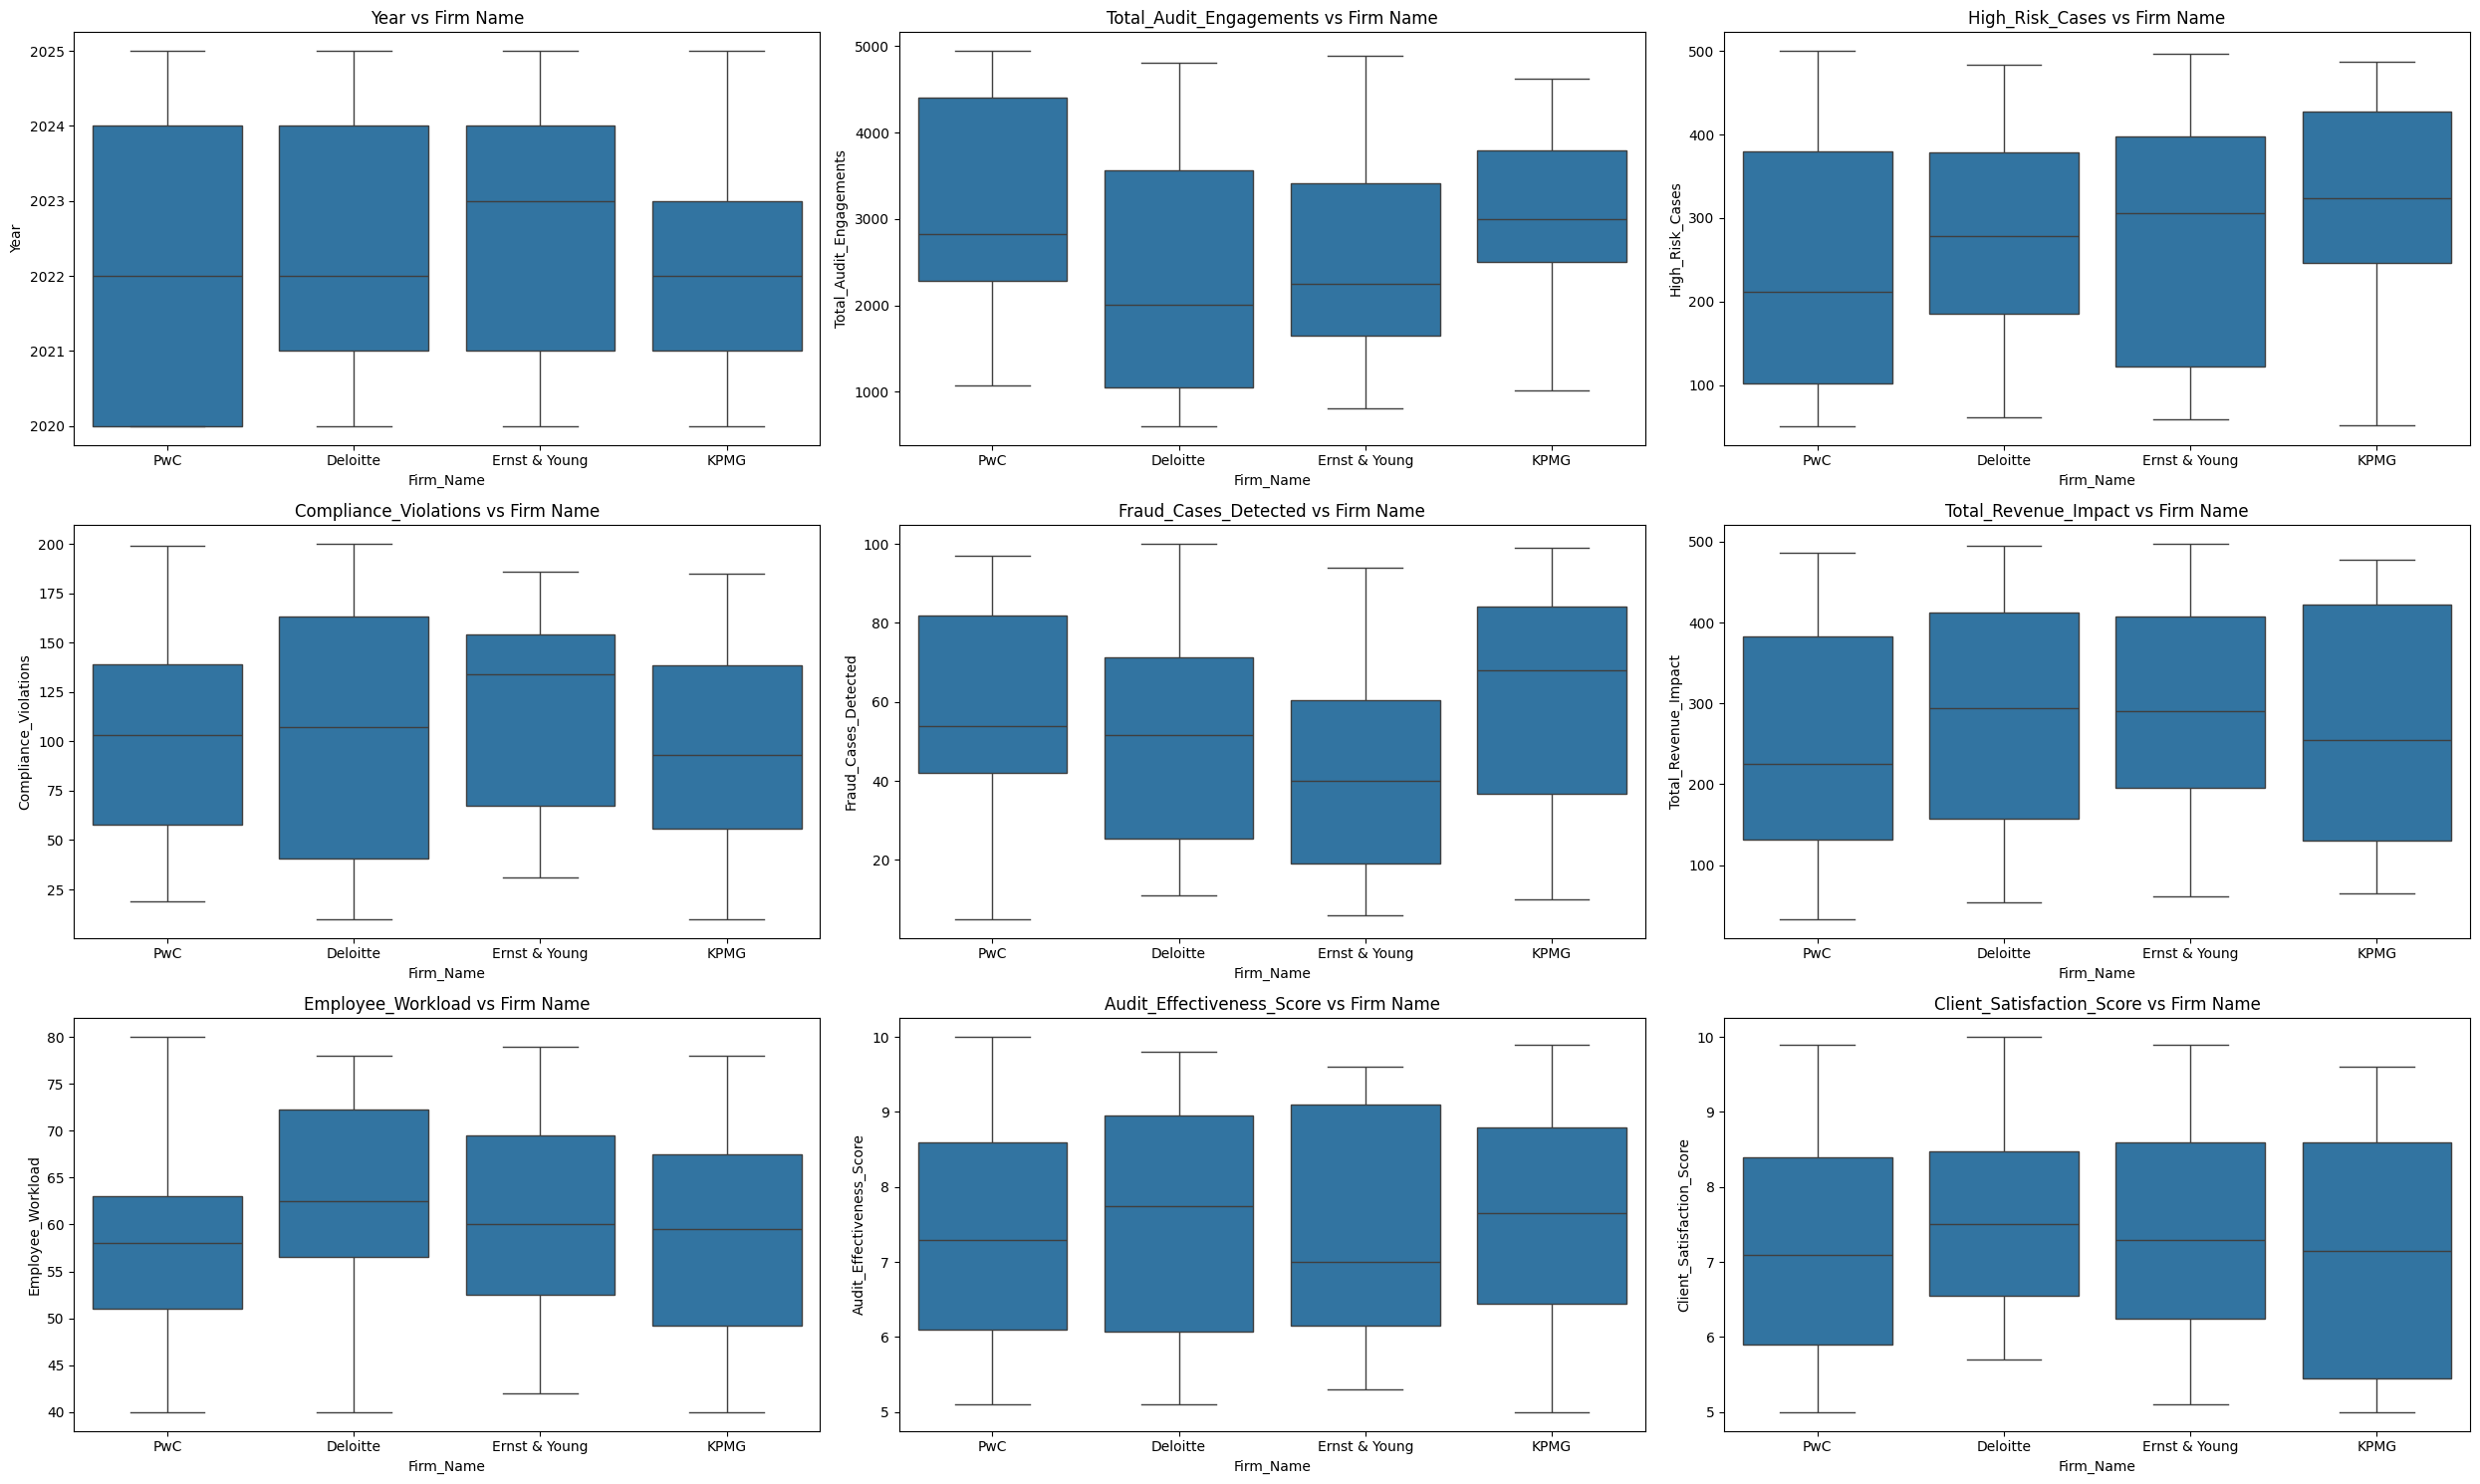

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()

# Boxplot
for i, col in enumerate(num_cols):

  sns.boxplot(data=data, y=col, x='Firm_Name', ax=axes[i])
  axes[i].set_title(f"{col} vs Firm Name")

plt.tight_layout()
plt.show()

**KPMG:**
- Holds the highest total audit engagements.
- Records the highest number of high-risk cases and fraud cases detected.
- Maintains the lowest compliance violations.

**PwC:**
- Reports the lowest number of high-risk cases.
- Despite this, it has the second-highest fraud cases detected, suggesting many fraud cases are undetected.
- Ranks second in total audit engagements.
- Generates the lowest total revenue impact, reflecting better control over financial losses.
- Has the lowest employee workload.
- Scores the lowest in client satisfaction.

**Ernst & Young:**
- Has the second-lowest total audit engagements.
- Records the second-highest high-risk cases, yet detects the fewest fraud cases.
- Shows the second-highest total revenue impact, meaning fraud and compliance issues are costly when they occur.
- Suffers from the highest compliance violations.
- Earns the lowest audit effectiveness score.
- Achieves the second-highest client satisfaction score.

**Delloite**:
- Records the fewest total audit engagements, but faces the highest employee workload.
- Has the highest total revenue impact due to fraud or compliance issue.
- Scores the highest in both audit effectiveness and client satisfaction.

> Note : Low Total Revenue Impact indicates better control over financial losses.

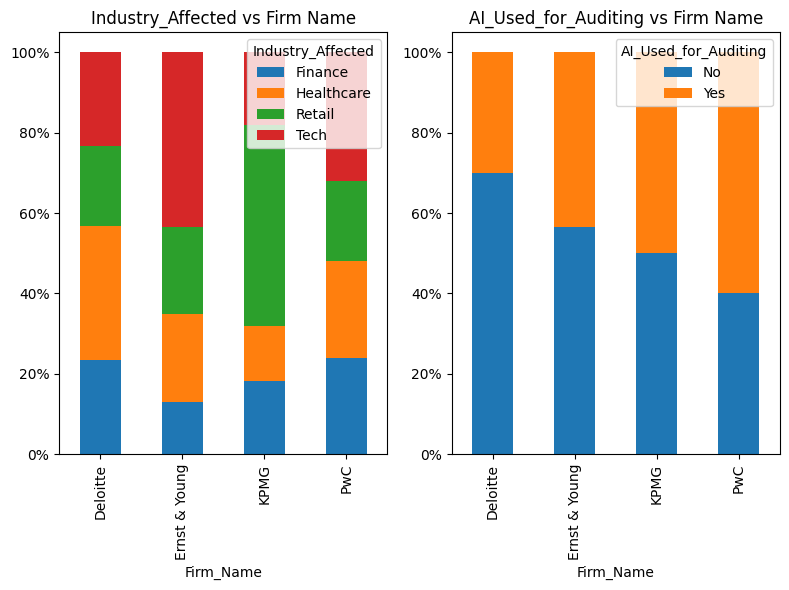

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))
col_to_plot = ['Industry_Affected', 'AI_Used_for_Auditing']

for i, col in enumerate (col_to_plot):
  (data.groupby('Firm_Name')[col].value_counts(normalize=True)
      .unstack(col)
      .plot.bar(stacked=True, ax=axes[i])
  )
  axes[i].set_title(f'{col} vs Firm Name')
  axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

plt.tight_layout()
plt.show()

- PwC demonstrates the highest adoption of AI in auditing among the firms, while Deloitte records the lowest. This indicates that PwC is more tech-driven in its audit approach, whereas Deloitte continues to rely more on traditional methods.

- PwC's strong adoption of AI appears to contribute to a lighter employee workload, suggesting that AI may help reduce manual effort and improve efficiency.

- The Technology sector is the most affected industry, followed by Retail.

## Heatmap

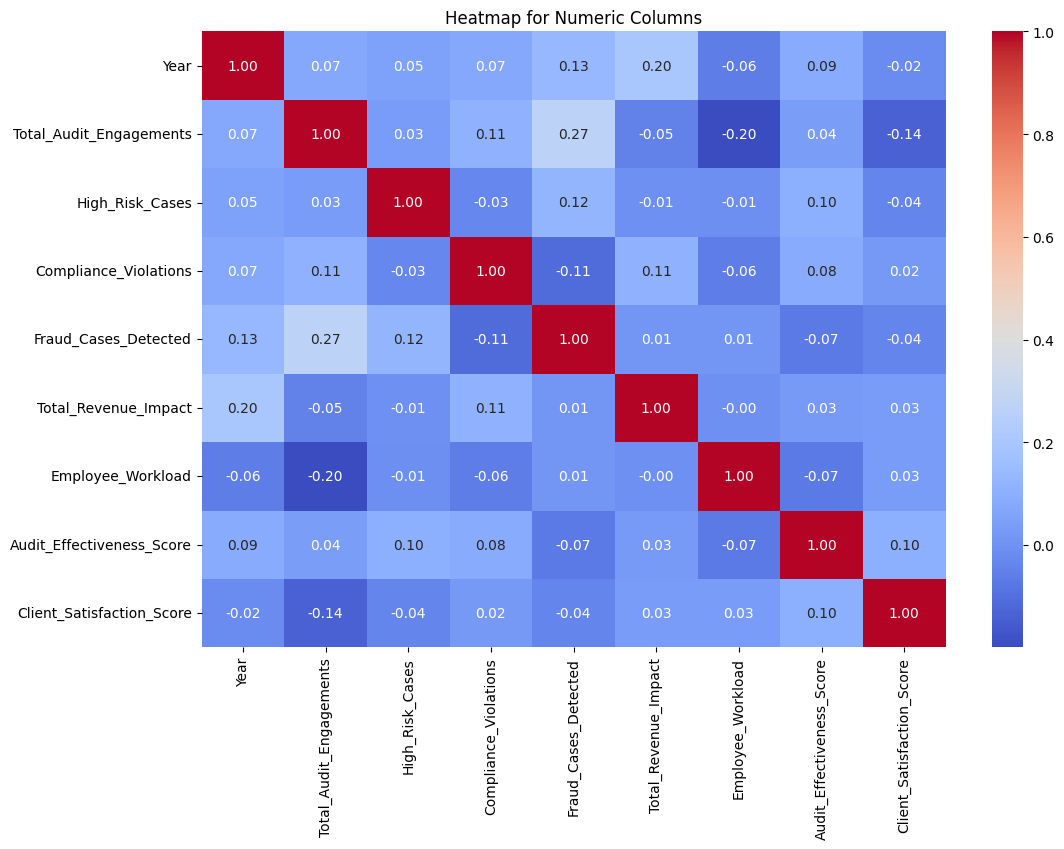

In [66]:
# Heatmap (only numeric columns)
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap for Numeric Columns")
plt.show()

All variables show **weak correlations** with each other, with the highest correlation observed being only 0.27.

# Performance Analysis

In [13]:
firm_summary = data.groupby('Firm_Name').agg(
    Total_Engagements=('Total_Audit_Engagements', 'sum'),
    Total_Fraud_Detected=('Fraud_Cases_Detected', 'sum'),
    Total_Violations=('Compliance_Violations', 'sum')
).reset_index()

# 1. Fraud Detection Rasio (high = good)
firm_summary['Fraud_Detection_Ratio'] = (
    firm_summary['Total_Fraud_Detected'] / firm_summary['Total_Engagements']
)

# 2. Compliance Violation Rasio (low = good)
firm_summary['Compliance_Violation_Ratio'] = (
    firm_summary['Total_Violations'] / firm_summary['Total_Engagements']
)

In [14]:
firm_summary

,Firm_Name,Total_Engagements,Total_Fraud_Detected,Total_Violations,Fraud_Detection_Ratio,Compliance_Violation_Ratio
0,Deloitte,71631,1481,3127,0.020675,0.043654
1,Ernst & Young,59730,1031,2724,0.017261,0.045605
2,KPMG,67155,1319,2070,0.019641,0.030824
3,PwC,79936,1439,2627,0.018002,0.032864


In [15]:
best_fraud_detectors = firm_summary.sort_values(by='Fraud_Detection_Ratio', ascending=False)
print(f'Best Fraud Detector : {best_fraud_detectors[:1]['Firm_Name'].iloc[0]}')

cleanest_firms = firm_summary.sort_values(by='Compliance_Violation_Ratio', ascending=True)
print(f'Cleanest Firm : {cleanest_firms[:1]['Firm_Name'].iloc[0]}')

Best Fraud Detector : Deloitte
Cleanest Firm : KPMG


## Does High Workload Increase Violation and Decrease Effectiveness?

In [16]:
data[['Audit_Effectiveness_Score', 'Employee_Workload', 'Compliance_Violations']].corr()

,Audit_Effectiveness_Score,Employee_Workload,Compliance_Violations
Audit_Effectiveness_Score,1.000000,-0.070690,0.084088
Employee_Workload,-0.070690,1.000000,-0.062901
Compliance_Violations,0.084088,-0.062901,1.000000


All correlations are very close to zero, meaning there is **no meaningful relationship** between audit effectiveness, employee workload, and compliance violations in this dataset.

## Does AI Help?

In [57]:
ai_analysis_sum = data.groupby('AI_Used_for_Auditing')[['Fraud_Cases_Detected', 'Total_Revenue_Impact']].sum().reset_index()
ai_analysis_mean = data.groupby('AI_Used_for_Auditing')[['Fraud_Cases_Detected', 'Total_Revenue_Impact']].mean().reset_index()

ai_analysis_sum

,AI_Used_for_Auditing,Fraud_Cases_Detected,Total_Revenue_Impact
0,No,3010,16114.13
1,Yes,2260,11139.77


In [58]:
ai_analysis_mean

,AI_Used_for_Auditing,Fraud_Cases_Detected,Total_Revenue_Impact
0,No,54.727273,292.984182
1,Yes,50.222222,247.550444


/tmp/ipython-input-1362902346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Used_for_Auditing', y='Fraud_Cases_Detected', data=ai_analysis_mean,
/tmp/ipython-input-1362902346.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Used_for_Auditing', y='Total_Revenue_Impact', data=ai_analysis_mean,
/tmp/ipython-input-1362902346.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AI_Used_for_Auditing', y='Fraud_Cases_Detected', data=ai_analysis_sum,
/tmp/ipython-input-1362902346.py:25: FutureWarning: 

Passing `palette` wit

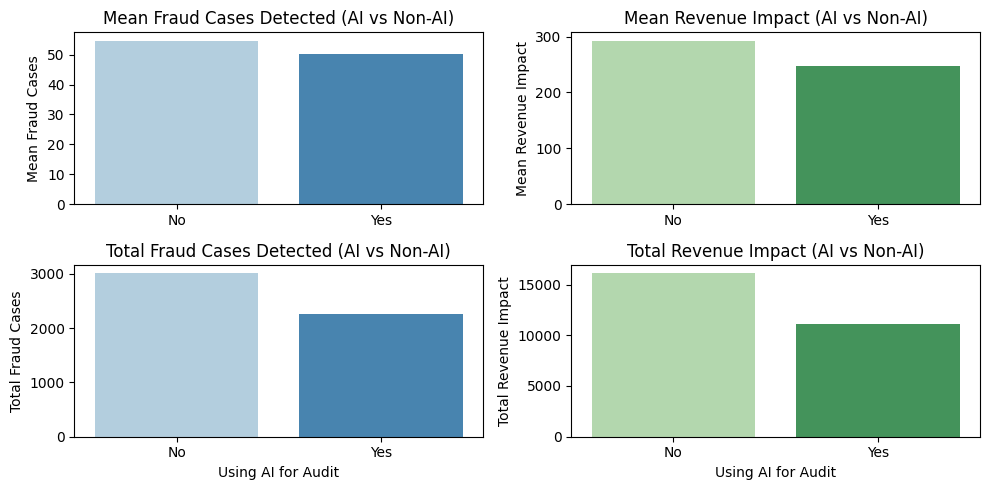

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Plot 1: Mean Fraud Case Detected
sns.barplot(x='AI_Used_for_Auditing', y='Fraud_Cases_Detected', data=ai_analysis_mean,
            ax=axes[0,0], palette="Blues")
axes[0,0].set_title('Mean Fraud Cases Detected (AI vs Non-AI)')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Mean Fraud Cases')

# Plot 2: Mean Revenue Impact
sns.barplot(x='AI_Used_for_Auditing', y='Total_Revenue_Impact', data=ai_analysis_mean,
            ax=axes[0,1], palette="Greens")
axes[0,1].set_title('Mean Revenue Impact (AI vs Non-AI)')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Mean Revenue Impact')

# Plot 3: Sum Fraud Case Detected
sns.barplot(x='AI_Used_for_Auditing', y='Fraud_Cases_Detected', data=ai_analysis_sum,
            ax=axes[1,0], palette="Blues")
axes[1,0].set_title('Total Fraud Cases Detected (AI vs Non-AI)')
axes[1,0].set_xlabel('Using AI for Audit')
axes[1,0].set_ylabel('Total Fraud Cases')

# Plot 4: Sum Revenue Impact
sns.barplot(x='AI_Used_for_Auditing', y='Total_Revenue_Impact', data=ai_analysis_sum,
            ax=axes[1,1], palette="Greens")
axes[1,1].set_title('Total Revenue Impact (AI vs Non-AI)')
axes[1,1].set_xlabel('Using AI for Audit')
axes[1,1].set_ylabel('Total Revenue Impact')

plt.tight_layout()
plt.show()


Although AI-based audits detect fewer fraud cases, they are associated with a significantly lower financial impact. This indicates that **AI is more effective at preventing fraud from escalating into costly losses**, focusing on risk control rather than simply increasing the number of detected cases.

In [22]:
data.groupby('AI_Used_for_Auditing')['Employee_Workload'].mean()

,Employee_Workload
AI_Used_for_Auditing,
No,61.036364
Yes,59.288889


AI **may** help reduce workload, but it's a small difference.

## Industries with High Risk

In [23]:
industry_risk = data.groupby('Industry_Affected')[['High_Risk_Cases', 'Fraud_Cases_Detected', 'Total_Revenue_Impact']].mean().sort_values(by='High_Risk_Cases', ascending=False)

industry_risk

,High_Risk_Cases,Fraud_Cases_Detected,Total_Revenue_Impact
Industry_Affected,,,
Healthcare,308.125000,58.750000,228.149583
Finance,304.250000,55.050000,297.010000
Retail,259.259259,50.555556,322.085185
Tech,251.482759,48.068966,246.269310


In [25]:
industry_risk.columns

Index(['High_Risk_Cases', 'Fraud_Cases_Detected', 'Total_Revenue_Impact'], dtype='object')

/tmp/ipython-input-72207560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_risk.index, y=values, ax=axes[i], palette=colors)
/tmp/ipython-input-72207560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_risk.index, y=values, ax=axes[i], palette=colors)
/tmp/ipython-input-72207560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_risk.index, y=values, ax=axes[i], palette=colors)


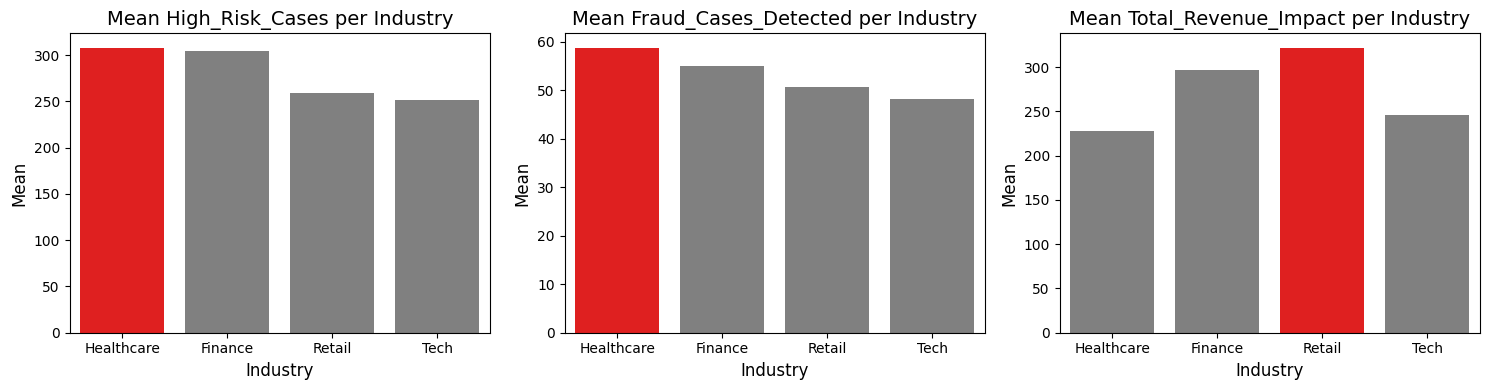

In [54]:
# Plot 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, col in enumerate(industry_risk.columns):
    values = industry_risk[col]

    max_idx = values.idxmax()
    min_idx = values.idxmin()

    colors = ['red' if idx == max_idx else 'grey' for idx in values.index]

    sns.barplot(x=industry_risk.index, y=values, ax=axes[i], palette=colors)

    axes[i].set_title(f'Mean {col} per Industry', fontsize=14)
    axes[i].set_xlabel('Industry', fontsize=12)
    axes[i].set_ylabel('Mean', fontsize=12)

plt.tight_layout()
plt.show()

Conclusion from 2 plots:
1. Healthcare manages to keep **revenue impact relatively low** despite having the highest number of high-risk cases and fraud detections.
2. Finance faces nearly as many high-risk cases as Healthcare but suffers a higher revenue impact, showing **weaker fraud loss control**.
3. Retail records fewer high-risk cases than Healthcare and Finance, yet bears the highest financial losses, indicating **poor fraud management**.
4. Tech shows the lowest high-risk and fraud detection counts, but its revenue impact remains moderate, reflecting **mixed risk management**.
